# The 10-armed Testbed

In this section we numerically compare the greedy and $\epsilon$-greedy action-value methods to compare the relative effectiveness of them. We have a set of 2000 randomly generated $k$-armed bandit problems with $k=10$. For each bandit problem, the action values, $q_*(a)$, $a=1,\cdots,10$, were selected according to a standard normal distribution. Then, when a learning method applied to that problem selected action $A_t$ at time step $t$, the actual reward $R_t$, was selected from a normal distribution with mean $q_*(A_t)$ and variance 1. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_episodes = 2000
n_timesteps = 1000
k = 10
epsilons = [0, 0.1, 0.01]
n_epsilons = len(epsilons)

In [3]:

# one episode, one epsilon
history = [[[0 for _ in range(n_timesteps)] for _ in range(n_episodes)] for _ in range(n_epsilons)]

for episode in range(n_episodes):
    q_star = [np.random.normal(0, 1) for _ in range(k)]
    q_hat = [[0 for _ in range(k)] for _ in range(n_epsilons)]
    action_count = [[0 for _ in range(k)] for _ in range(n_epsilons)]
    
    for timestep in range(n_timesteps):
        # random number between 0 and 1
        random_number = np.random.rand()
        
        for i in range(n_epsilons):
            epsilon = epsilons[i]
            
            # choose a random action with probability epsilon
            if random_number < epsilon:
                action = np.random.choice(range(k))
            else:
                action = np.argmax(q_hat[i])

            # the reward is selected from a normal distribution with mean q_star and variance 1
            reward = np.random.normal(q_star[action], 1)
            history[i][episode][timestep] = reward

            # update the estimate of q_star
            q_hat[i][action] = (q_hat[i][action] * action_count[i][action] + reward) / (action_count[i][action] + 1)
            action_count[i][action] += 1

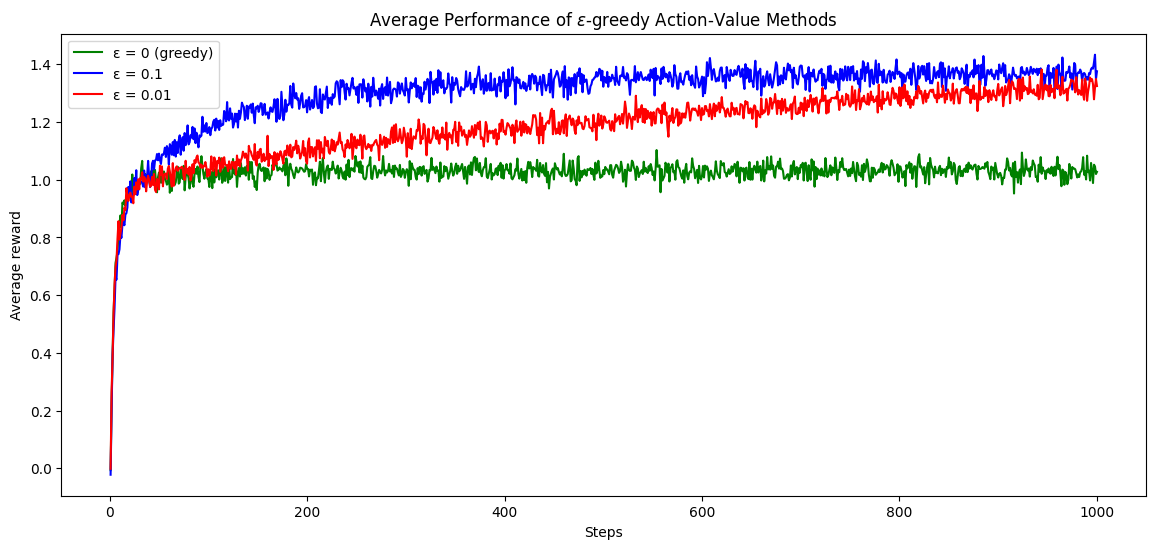

In [4]:
# Calculate average reward
avg_rewards = np.zeros((n_epsilons, n_timesteps))
for i in range(n_epsilons):
    for t in range(n_timesteps):
        avg_rewards[i, t] = np.mean([history[i][ep][t] for ep in range(n_episodes)])

# Plotting
plt.figure(figsize=(14, 6))
colors = ['green', 'blue', 'red']  # Corresponding to epsilons [0, 0.1, 0.01]
labels = ['ε = 0 (greedy)', 'ε = 0.1', 'ε = 0.01']

for i in range(n_epsilons):
    plt.plot(range(1, n_timesteps + 1), avg_rewards[i], color=colors[i], label=labels[i])

plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('Average Performance of $\epsilon$-greedy Action-Value Methods')
plt.legend()
plt.show()

The greedy method turned out to show the poorest performance when compared to $\epsilon$-greedy methods. This is because it got stuck at suboptimal choice of actions. The $\epsilon$-greedy methods performed better in the long run because they continued to explore and to improve the cahnces of recognising the optimal aciton. Note that it is also possible to have decaying $\epsilon$ over time.

The advantage of $\epsilon$-greedy over greedy methods depends on the task. Suppose the reward variance had been larger. With noisier rewards it takes more exploration to find the optimal action, and $\epsilon$-greedy methods should fare even better relative to the greedy method. On the other hand, if the reward variances were zero, then the greedy method would know the true value of each action after trying it once, in which case the greedy method might perform the best because it would find the optimal action and then never explore.

However, even if the reward system was deterministic, if the task was stationary and the true values of the actions change over time, it is beneficial to choose $\epsilon$-greedy methods. Indeed, nonstationarity is the case most commonly encountered in reinforcement learning. Most of the reinforcement learning requires a balance between exploitation and exploration.